In [8]:
import numpy as np
if not hasattr(np, 'int'):
    np.int = int

In [9]:
import torch
from spikingjelly.activation_based import neuron
from spikingjelly import visualizing
from matplotlib import pyplot as plt

In [10]:
if_layer = neuron.IFNode()

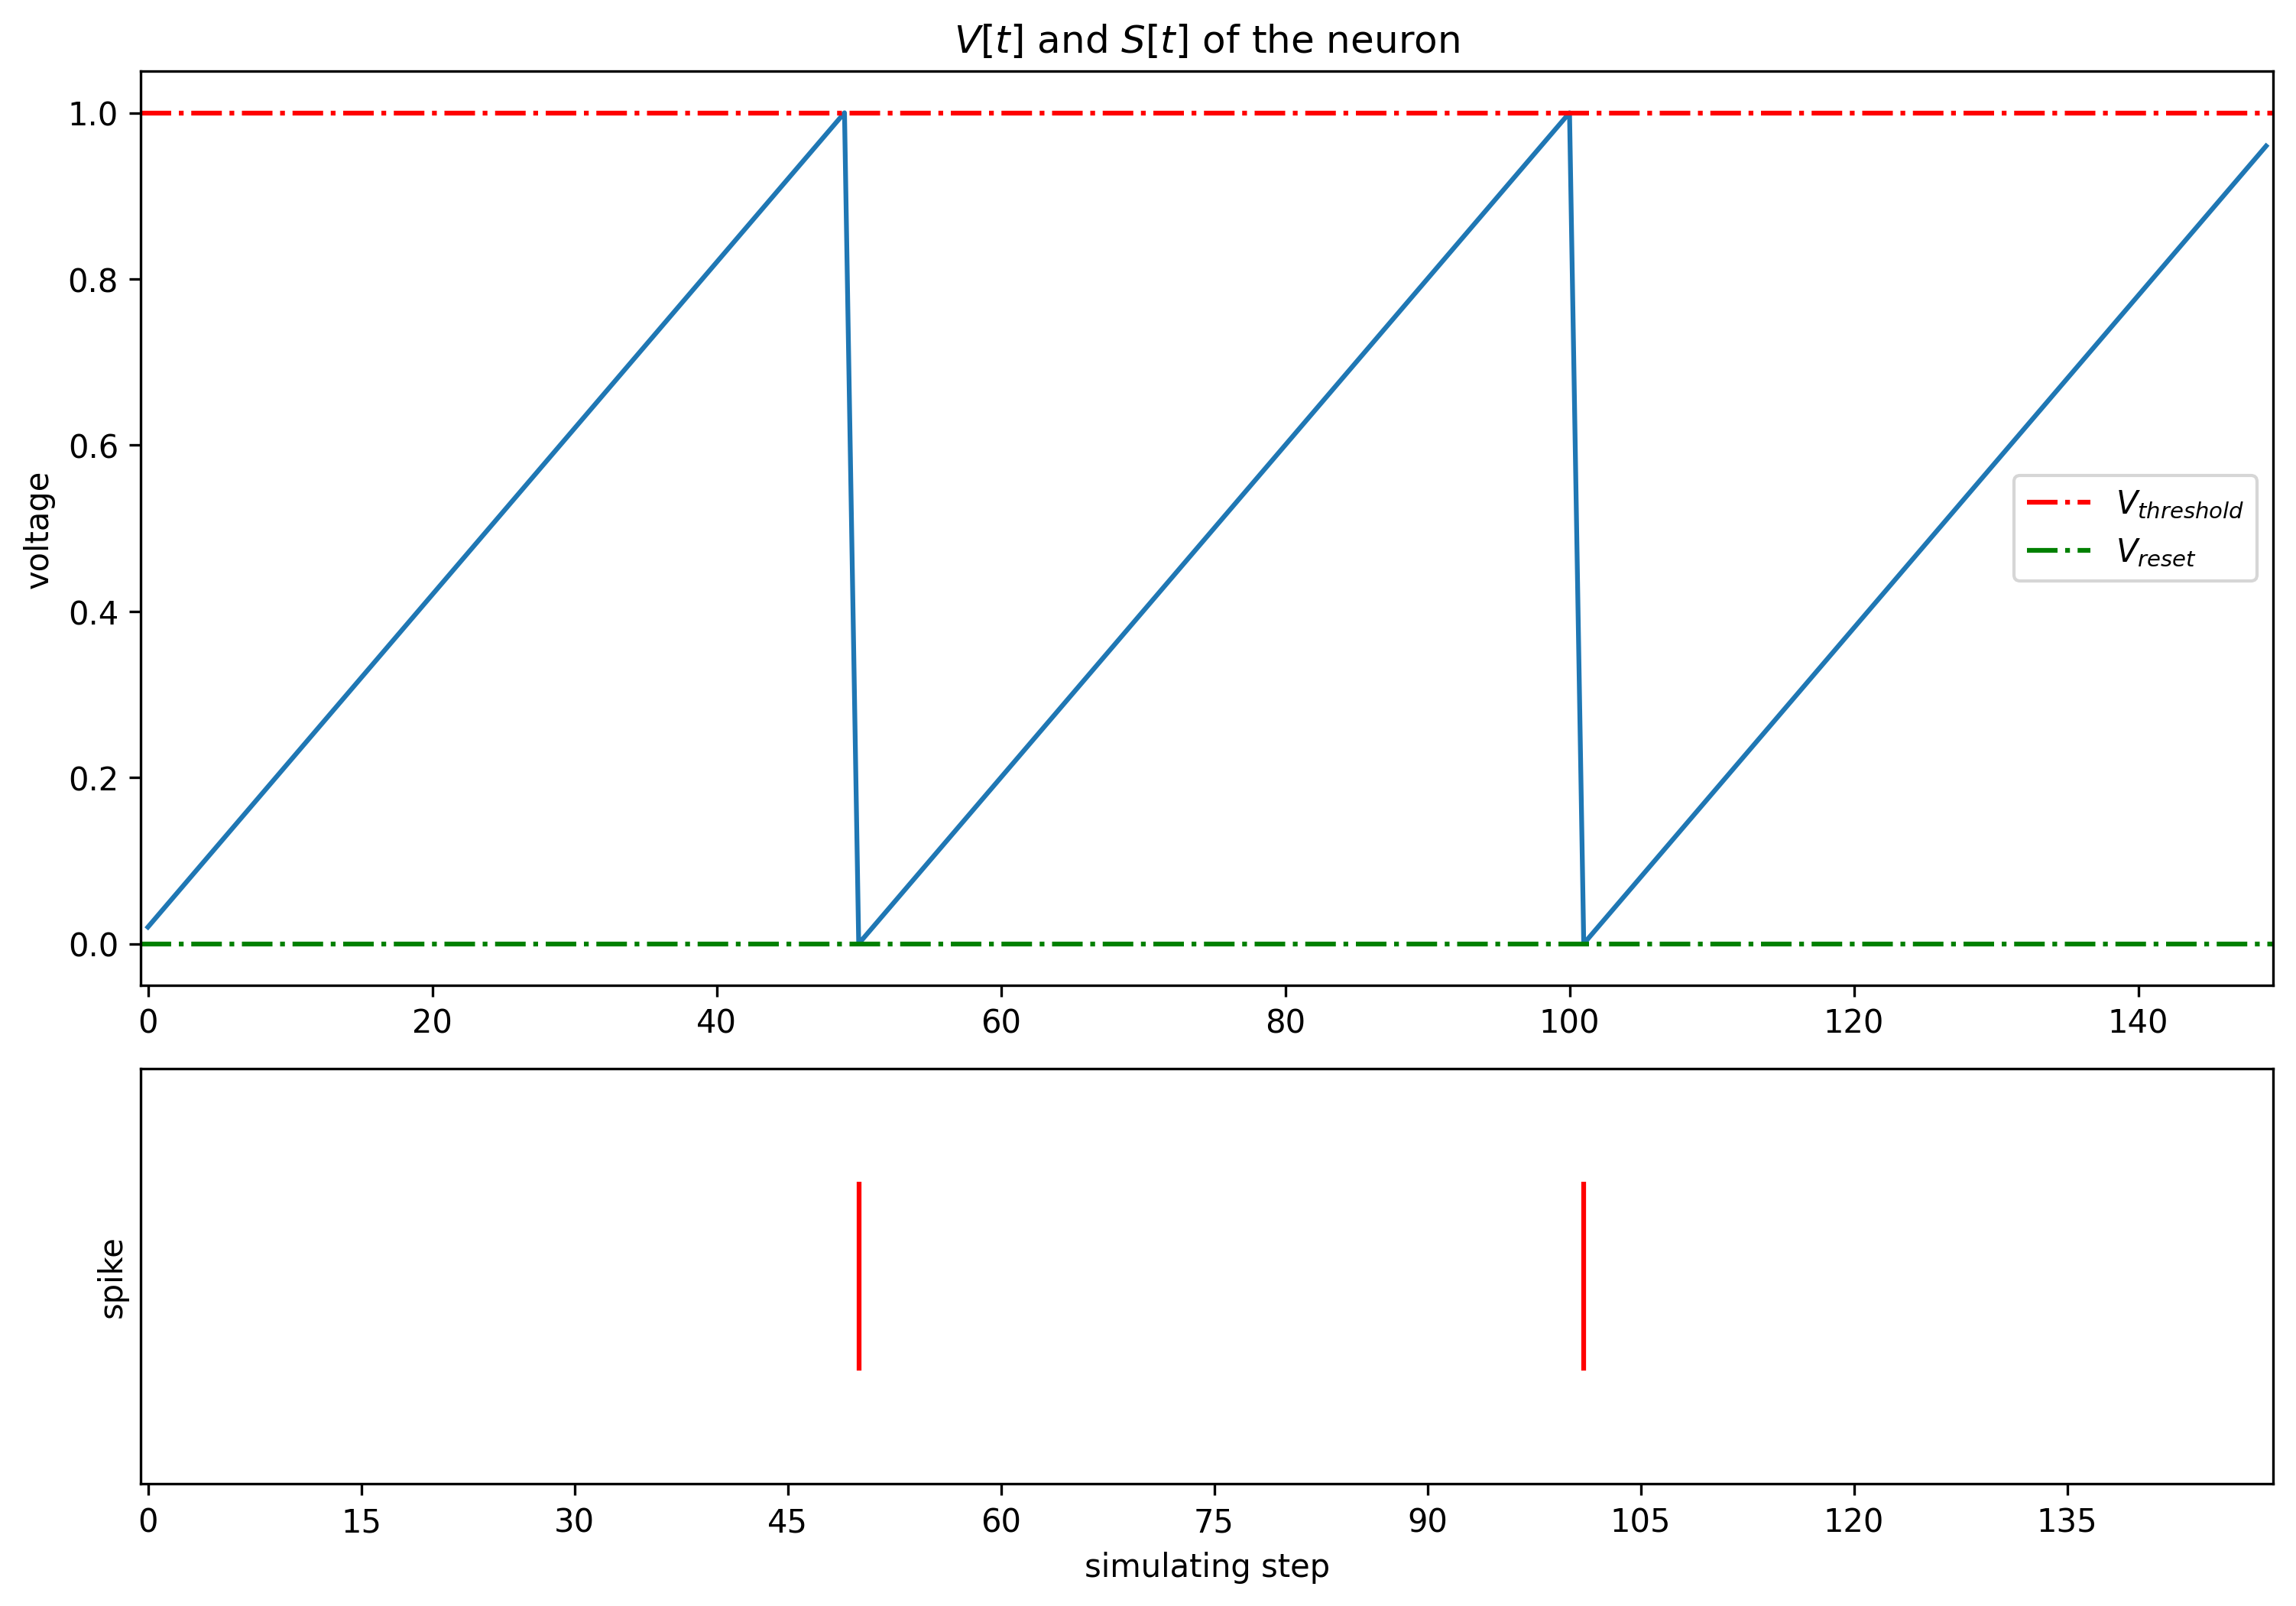

In [11]:
if_layer.reset()
x = torch.as_tensor([0.02])
T = 150
s_list = []
v_list = []
for t in range(T):
    s_list.append(if_layer(x))
    v_list.append(if_layer.v)

dpi = 300
figsize = (12, 8)
visualizing.plot_one_neuron_v_s(torch.cat(v_list).numpy(), torch.cat(s_list).numpy(), v_threshold=if_layer.v_threshold,
                                v_reset=if_layer.v_reset,
                                figsize=figsize, dpi=dpi)
plt.show()

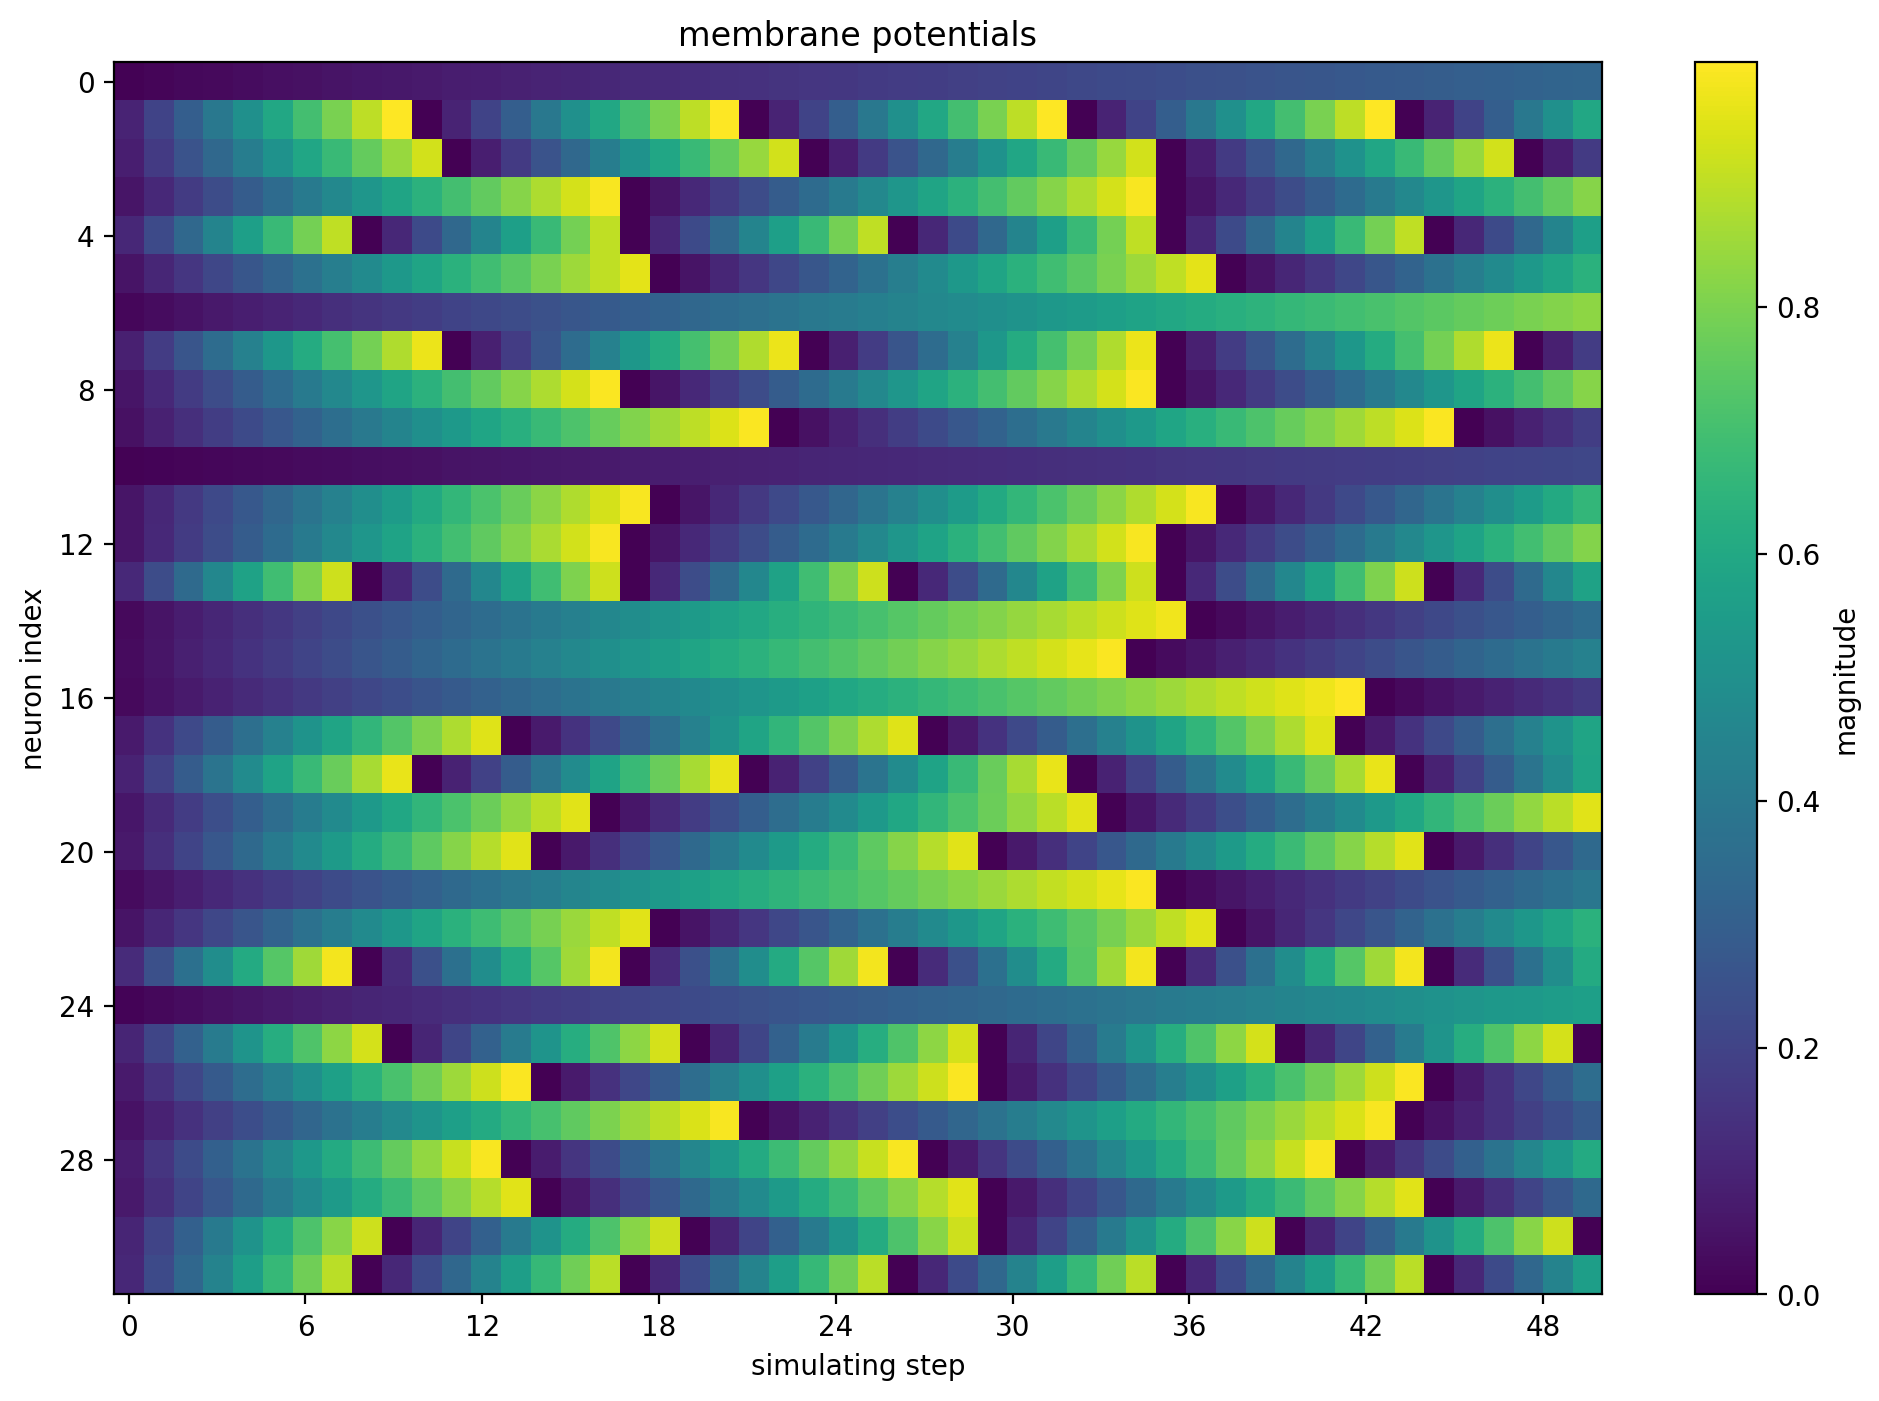

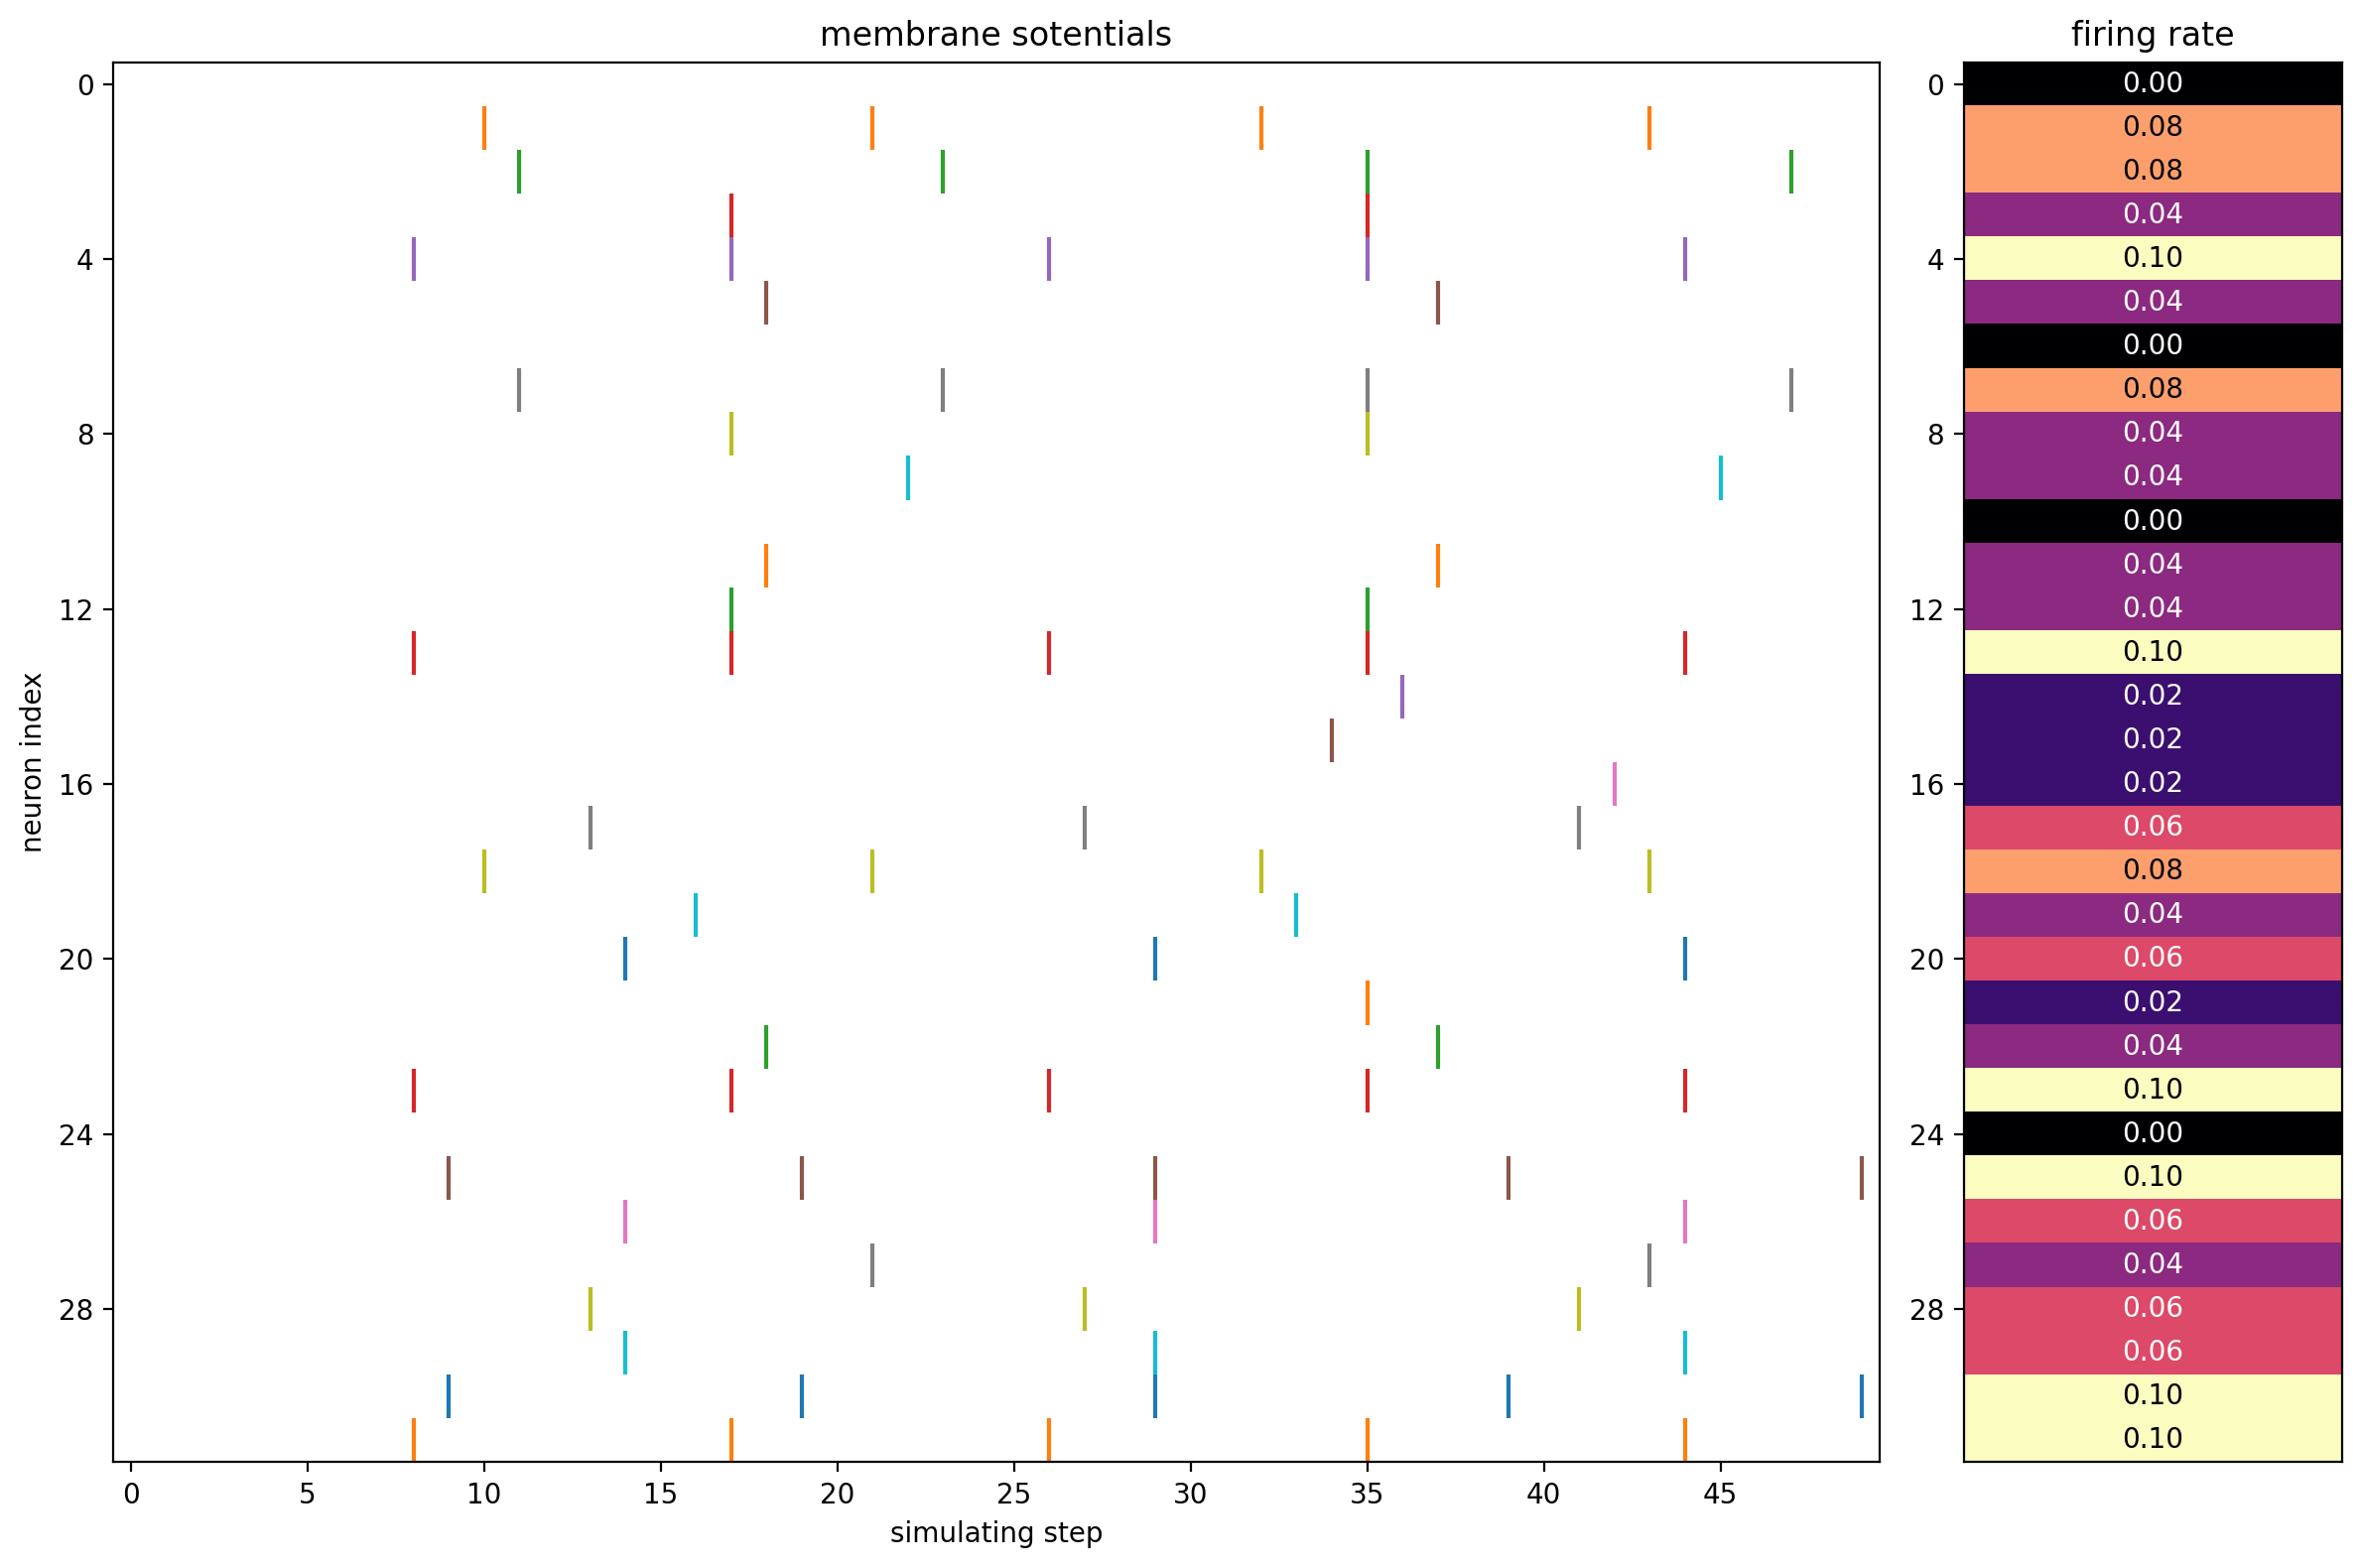

In [12]:
if_layer.reset()
T = 50
x = torch.rand([32]) / 8.
s_list = []
v_list = []
for t in range(T):
    s_list.append(if_layer(x).unsqueeze(0))
    v_list.append(if_layer.v.unsqueeze(0))

s_list = torch.cat(s_list)
v_list = torch.cat(v_list)

figsize = (12, 8)
dpi = 200
visualizing.plot_2d_heatmap(array=v_list.numpy(), title='membrane potentials', xlabel='simulating step',
                            ylabel='neuron index', int_x_ticks=True, x_max=T, figsize=figsize, dpi=dpi)


visualizing.plot_1d_spikes(spikes=s_list.numpy(), title='membrane sotentials', xlabel='simulating step',
                        ylabel='neuron index', figsize=figsize, dpi=dpi)

plt.show()

In [13]:
import torch
from spikingjelly.activation_based import neuron, functional
if_layer = neuron.IFNode(step_mode='s')
T = 8
N = 2
x_seq = torch.rand([T, N])
y_seq = functional.multi_step_forward(x_seq, if_layer)
if_layer.reset()

if_layer.step_mode = 'm'
y_seq = if_layer(x_seq)
if_layer.reset()

In [14]:
%pip install cupy-cuda11x
import torch
from spikingjelly.activation_based import neuron
if_layer = neuron.IFNode()
print(f'if_layer.backend={if_layer.backend}')
# if_layer.backend=torch

print(f'step_mode={if_layer.step_mode}, supported_backends={if_layer.supported_backends}')
# step_mode=s, supported_backends=('torch',)


if_layer.step_mode = 'm'
print(f'step_mode={if_layer.step_mode}, supported_backends={if_layer.supported_backends}')
# step_mode=m, supported_backends=('torch', 'cupy')

device = 'cuda:0'
if_layer.to(device)
if_layer.backend = 'cupy'  # switch to the cupy backend
print(f'if_layer.backend={if_layer.backend}')
# if_layer.backend=cupy

x_seq = torch.rand([8, 4], device=device)
y_seq = if_layer(x_seq)
if_layer.reset()

Note: you may need to restart the kernel to use updated packages.
if_layer.backend=torch
step_mode=s, supported_backends=('torch',)
step_mode=m, supported_backends=('torch', 'cupy')
if_layer.backend=cupy
